Projeto Portfólio - Análise de Acidentes de Trânsito 2021 

In [1]:
#Importando bibliotecas a serem utilizadas.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Realizando a importação dos dados, informando o arquivo bruto, que anteriormente visualizei no Excel.

In [33]:
acidentes = pd.read_csv('acidentes2021.csv', sep=';', encoding='latin-1')

#Mostrar todas as colunas do DataFrame
pd.set_option('display.max_columns', None) 

acidentes.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,331730.0,738258.0,2021-01-01,sexta-feira,05:30:00,SP,116.0,453,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Amanhecer,Crescente,Nublado,Dupla,Curva,Não,595150,Caminhão,VOLVO/VM 260 6X2R,2010.0,Condutor,Lesões Leves,35.0,Masculino,0,1,0,0,-24.561681,-47.867522,SR-SP,UOP01,DEL05
1,331804.0,738412.0,2021-01-01,sexta-feira,08:05:00,AM,174.0,937,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Não,595262,Caminhão-trator,SCANIA/R112 H,1982.0,Condutor,Ileso,65.0,Masculino,1,0,0,0,-2.508068,-60.036434,SR-AM,UOP01,DEL01
2,331815.0,738692.0,2021-01-01,sexta-feira,10:10:00,CE,222.0,"128,5",ITAPAJE,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,595291,Caminhão-trator,SCANIA/R124 GA4X2NZ 360,1999.0,Passageiro,Lesões Leves,NaN,Feminino,0,1,0,0,-3.707626,-39.623509,SR-CE,UOP03,DEL04
3,331815.0,738689.0,2021-01-01,sexta-feira,10:10:00,CE,222.0,"128,5",ITAPAJE,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,595291,Caminhão-trator,SCANIA/R124 GA4X2NZ 360,1999.0,Condutor,Lesões Leves,35.0,Masculino,0,1,0,0,-3.707626,-39.623509,SR-CE,UOP03,DEL04
4,331823.0,740272.0,2021-01-01,sexta-feira,12:30:00,RJ,493.0,18,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Simples,Curva,Sim,595234,Caminhão-trator,VOLVO/FH 460 6X2T,2017.0,Condutor,Ileso,51.0,Masculino,1,0,0,0,-22.668712,-43.018627,SR-RJ,UOP04,DEL02


Vamos verificar o tamanho de nossa base de dados e listar em seguida as colunas do dataset. 
Identificando nesse caso que o dataset possui 35 colunas e 150.615 linhas. Além de diversas colunas que pode não ser interessadas para nossa análise.

In [3]:
acidentes.shape

(150615, 35)

In [4]:
acidentes.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'id_veiculo', 'tipo_veiculo', 'marca', 'ano_fabricacao_veiculo',
       'tipo_envolvido', 'estado_fisico', 'idade', 'sexo', 'ilesos',
       'feridos_leves', 'feridos_graves', 'mortos', 'latitude', 'longitude',
       'regional', 'delegacia', 'uop'],
      dtype='object')

Devido a quantidade de colunas, vamos filtrar e retirar colunas que serão desnecessárias para nossa análise. Essa avaliaçao das colunas foi feito via Excel pois facilita a visualização dessas informações.

In [34]:
def remover_colunas(lista_colunas):
    for c in lista_colunas:
        acidentes.drop(c, axis=1, inplace=True)

remover_colunas(['pesid','km','sentido_via','br','tipo_pista','tracado_via','uso_solo','regional','delegacia', 'uop', 'id_veiculo', 'ano_fabricacao_veiculo', 
'marca', 'tipo_envolvido'])

Verificando as colunas restantes

In [35]:
acidentes.head()

,id,data_inversa,dia_semana,horario,uf,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_veiculo,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Amanhecer,Nublado,Caminhão,Lesões Leves,35.0,Masculino,0,1,0,0,-24.561681,-47.867522
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Céu Claro,Caminhão-trator,Ileso,65.0,Masculino,1,0,0,0,-2.508068,-60.036434
2,331815.0,2021-01-01,sexta-feira,10:10:00,CE,ITAPAJE,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Céu Claro,Caminhão-trator,Lesões Leves,NaN,Feminino,0,1,0,0,-3.707626,-39.623509
3,331815.0,2021-01-01,sexta-feira,10:10:00,CE,ITAPAJE,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Céu Claro,Caminhão-trator,Lesões Leves,35.0,Masculino,0,1,0,0,-3.707626,-39.623509
4,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,Com Vítimas Feridas,Pleno dia,Nublado,Caminhão-trator,Ileso,51.0,Masculino,1,0,0,0,-22.668712,-43.018627


Verificando a presença de valores nulos, vemos que na coluna IDADE possuimos 15.112 valores nulos, que podem ter vários motivos, como preenchimento de relatórios incorretamente.

In [7]:
acidentes.isnull().sum().sort_values(ascending=False)

idade                     15112
data_inversa                  0
dia_semana                    0
latitude                      0
mortos                        0
feridos_graves                0
feridos_leves                 0
ilesos                        0
sexo                          0
estado_fisico                 0
tipo_veiculo                  0
condicao_metereologica        0
fase_dia                      0
classificacao_acidente        0
tipo_acidente                 0
causa_acidente                0
municipio                     0
uf                            0
horario                       0
longitude                     0
dtype: int64

In [8]:
acidentes.describe()

,idade,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude
count,135503.000000,150615.000000,150615.000000,150615.000000,150615.000000,150615.000000,150615.000000
mean,39.606946,0.419938,0.359121,0.116861,0.035727,-18.781297,-46.678043
std,46.354930,0.493550,0.479744,0.321255,0.185609,7.827989,6.215742
min,0.000000,0.000000,0.000000,0.000000,0.000000,-33.689819,-72.119380
25%,27.000000,0.000000,0.000000,0.000000,0.000000,-25.286131,-50.372267
50%,37.000000,0.000000,0.000000,0.000000,0.000000,-20.358529,-47.782917
75%,48.000000,1.000000,1.000000,0.000000,0.000000,-12.725957,-42.602867
max,2020.000000,1.000000,1.000000,1.000000,1.000000,4.461419,-34.828232


In [9]:
acidentes.describe(include=['O'])

,data_inversa,dia_semana,horario,uf,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_veiculo,estado_fisico,sexo
count,150615,150615,150615,150615,150615,150615,150615,150615,150615,150615,150615,150615,150615
unique,365,7,1302,27,1790,71,17,3,4,10,25,5,4
top,2021-08-08,domingo,19:00:00,MG,BRASILIA,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Céu Claro,Automóvel,Ileso,Masculino
freq,733,25610,2169,19016,2383,15827,34617,114147,82261,90739,64044,63249,107204


In [10]:
acidentes.fase_dia.unique()

array(['Amanhecer', 'Pleno dia', 'Plena Noite', 'Anoitecer'], dtype=object)

Transformação dos Dados
- Vamos modificar a coluna fase_dia para que os valores nos deem um melhor entendimento. 

In [36]:
acidentes['fase_dia'].loc[(acidentes['horario'] >= '06:00:00') & (acidentes['horario'] <= '11:59:00')] = 'Manhã'
acidentes['fase_dia'].loc[(acidentes['horario'] >= '12:00:00') & (acidentes['horario'] <= '17:59:00')] = 'Tarde'
acidentes['fase_dia'].loc[(acidentes['horario'] >= '18:00:00') & (acidentes['horario'] <= '23:59:00')] = 'Noite'
acidentes['fase_dia'].loc[(acidentes['horario'] >= '00:00:00') & (acidentes['horario'] <= '05:59:00')] = 'Madrugada'

Plotando os dados da fase_dia já alterados, podemos identificar que a maioria dos acidentes aconteceram na parte da tarde.

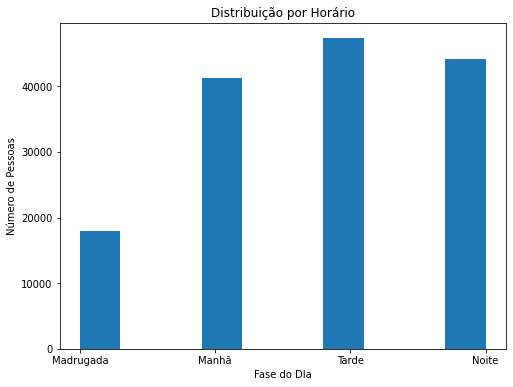

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(acidentes.fase_dia)
plt.title('Distribuição por Horário')
plt.xlabel('Fase do DIa')
plt.ylabel('Número de Pessoas');

Plotamos agora a distribuição por sexo, idenficando que grande maioria dos acidentes envolveram homens.

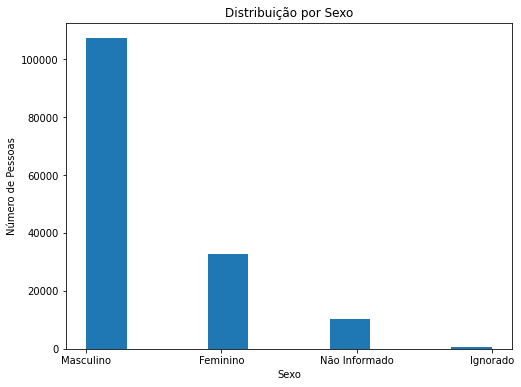

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(acidentes.sexo)
plt.title('Distribuição por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Pessoas');

Além da identificação de que a maioria dos acidentes ocorreram durante a tarde, eles ocorreram em céu claro. O que mostra em tese que grande parte está ligado a desatenção dos motoristas.

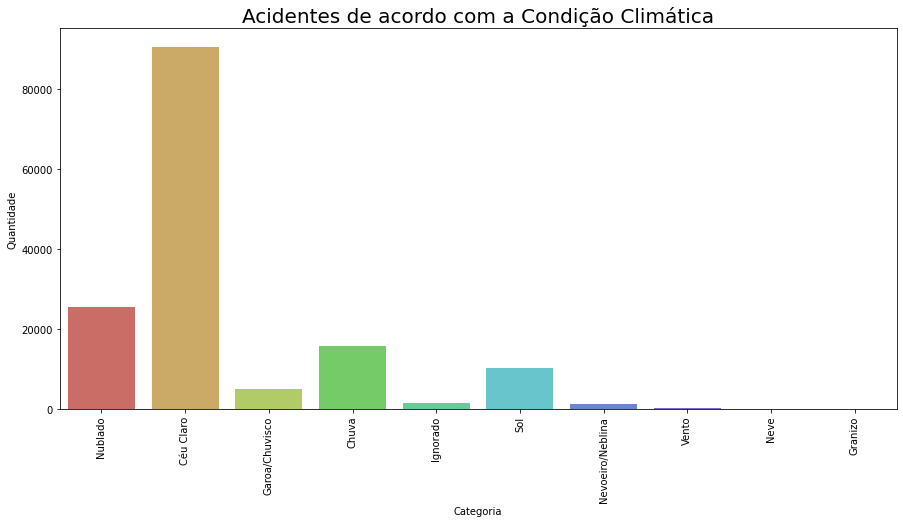

In [14]:
plt.figure(figsize=(15,7))
fig = sns.countplot(x=acidentes.condicao_metereologica, palette="hls")
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.title('Acidentes de acordo com a Condição Climática', size=20)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

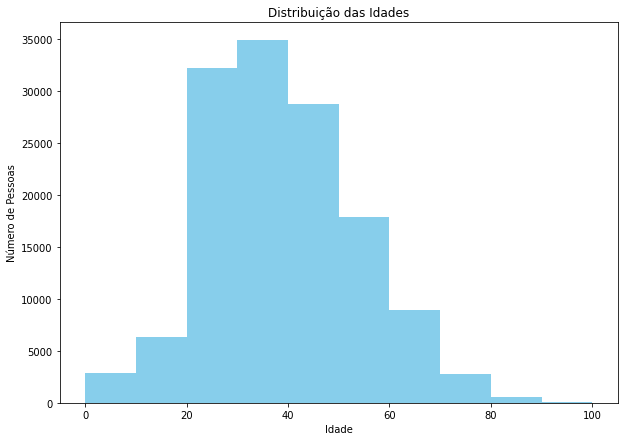

In [15]:
# Distribuição de acordo com a Idade:
plt.figure(figsize=(10, 7))
plt.hist(acidentes.idade, bins=range(0, 110, 10), color='skyblue')
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Número de Pessoas');

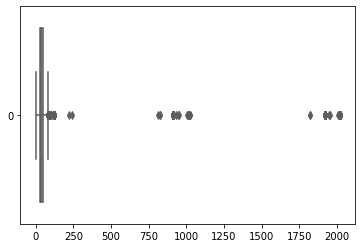

In [16]:
sns.boxplot(data = acidentes.idade, orient= 'h', palette='Greens');

In [37]:
# Quartil inferior e superior coluna 'idade'
def quartil():
    Q1 = acidentes['idade'].quantile(q= 0.25)
    Q3 = acidentes['idade'].quantile(q= 0.75)
    print(f'Q1 = {Q1} e Q3 = {Q3}')
    # Calculando a barreira externa.
    IIQ = Q3 - Q1
    limite_max = Q3 + 1.5 * IIQ
    limite_min = Q1 - 1.5 * IIQ
    print(f'Os Outliers da coluna idade estão entre {limite_min} e {limite_max}')
quartil()

Q1 = 27.0 e Q3 = 48.0
Os Outliers da coluna idade estão entre -4.5 e 79.5


In [38]:
# Selecionando somente as idades que estão dentro das extremidades (inferiores e superiores) do boxplot:
acidentes = acidentes.query('idade <= 79')

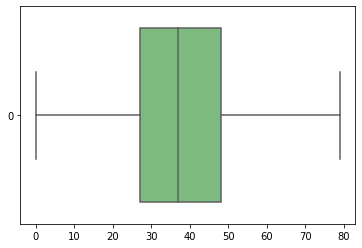

In [19]:
sns.boxplot(data = acidentes.idade, orient= 'h', palette='Greens');

In [39]:
# Preenchendo os valores nulos da coluna 'idade'
acidentes['idade'].fillna(acidentes['idade'].mean(), inplace=True)
acidentes['idade'] = acidentes['idade'].astype('int')

In [21]:
acidentes.isnull().sum().sort_values(ascending=False)

data_inversa              0
dia_semana                0
latitude                  0
mortos                    0
feridos_graves            0
feridos_leves             0
ilesos                    0
sexo                      0
idade                     0
estado_fisico             0
tipo_veiculo              0
condicao_metereologica    0
fase_dia                  0
classificacao_acidente    0
tipo_acidente             0
causa_acidente            0
municipio                 0
uf                        0
horario                   0
longitude                 0
dtype: int64

In [40]:
acidentes.tail()

,id,data_inversa,dia_semana,horario,uf,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_veiculo,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude
150608,415073.0,2021-12-13,segunda-feira,06:55:00,SP,TAUBATE,Ultrapassagem Indevida,Colisão transversal,Sem Vítimas,Manhã,Sol,Automóvel,Ileso,46,Masculino,1,0,0,0,-23.049605,-45.599737
150609,415073.0,2021-12-13,segunda-feira,06:55:00,SP,TAUBATE,Ultrapassagem Indevida,Colisão transversal,Sem Vítimas,Manhã,Sol,Automóvel,Ileso,30,Feminino,1,0,0,0,-23.049605,-45.599737
150610,415073.0,2021-12-13,segunda-feira,06:55:00,SP,TAUBATE,Ultrapassagem Indevida,Colisão transversal,Sem Vítimas,Manhã,Sol,Automóvel,Ileso,40,Feminino,1,0,0,0,-23.049605,-45.599737
150613,415604.0,2021-12-24,sexta-feira,19:30:00,MG,SABARA,Transitar na contramão,Colisão lateral sentido oposto,Com Vítimas Feridas,Noite,Céu Claro,Automóvel,Lesões Leves,67,Masculino,0,1,0,0,-19.809277,-43.787060
150614,415604.0,2021-12-24,sexta-feira,19:30:00,MG,SABARA,Transitar na contramão,Colisão lateral sentido oposto,Com Vítimas Feridas,Noite,Céu Claro,Automóvel,Lesões Leves,44,Masculino,0,1,0,0,-19.809277,-43.787060


In [41]:
# Agrupando as idades em 4 categorias:
# 0-15 anos (Crianca) / 16-20 anos (Jovem) / 20-59 anos (Adulto) / 59-78 anos (Idoso)
acidentes['idade'] = pd.cut(acidentes['idade'],[0,15,20,59,78], labels=['Crianca','Jovem','Adulto','Idoso'])

In [25]:
acidentes.tipo_veiculo.unique()

array(['Caminhão', 'Caminhão-trator', 'Semireboque', 'Reboque',
       'Automóvel', 'Motocicleta', 'Camioneta', 'Caminhonete',
       'Bicicleta', 'Carroça-charrete', 'Ônibus', 'Micro-ônibus',
       'Utilitário', 'Motoneta', 'Ciclomotor', 'Outros',
       'Trator de rodas', 'Carro de mão', 'Triciclo', 'Não Informado',
       'Chassi-plataforma', 'Trem-bonde', 'Quadriciclo',
       'Trator de esteira', 'Trator misto'], dtype=object)

In [42]:
# Tratando a coluna Tipo Veículo':
acidentes.tipo_veiculo.replace(['Caminhão-trator','Camioneta','Motoneta','Trem-bonde'],['Caminhão','Caminhonete','Motocicleta','Trem'], inplace=True)
acidentes.tipo_veiculo.replace(['Trator de rodas','Trator misto','Trator de esteira'],'Trator', inplace=True)
acidentes.tipo_veiculo.replace(['Ciclomotor','Triciclo','Quadriciclo'],'Bicicleta', inplace=True)

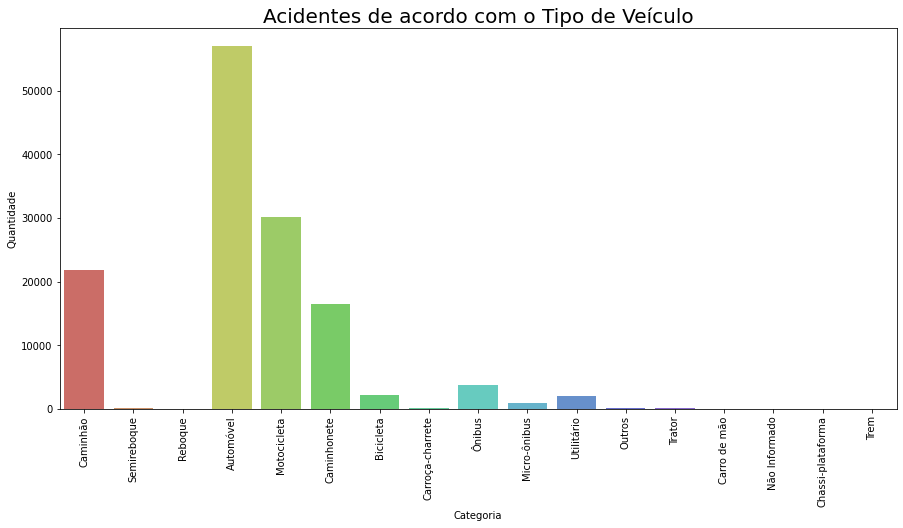

In [32]:
plt.figure(figsize=(15,7))
fig = sns.countplot(x=acidentes.tipo_veiculo, palette="hls")
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.title('Acidentes de acordo com o Tipo de Veículo', size=20)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

In [43]:
acidentes.head()

,id,data_inversa,dia_semana,horario,uf,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_veiculo,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Madrugada,Nublado,Caminhão,Lesões Leves,Adulto,Masculino,0,1,0,0,-24.561681,-47.867522
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Manhã,Céu Claro,Caminhão,Ileso,Idoso,Masculino,1,0,0,0,-2.508068,-60.036434
3,331815.0,2021-01-01,sexta-feira,10:10:00,CE,ITAPAJE,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Manhã,Céu Claro,Caminhão,Lesões Leves,Adulto,Masculino,0,1,0,0,-3.707626,-39.623509
4,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,Com Vítimas Feridas,Tarde,Nublado,Caminhão,Ileso,Adulto,Masculino,1,0,0,0,-22.668712,-43.018627
5,331843.0,2021-01-01,sexta-feira,14:40:00,RJ,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,Com Vítimas Feridas,Tarde,Nublado,Caminhão,Ileso,Adulto,Masculino,1,0,0,0,-22.434220,-43.775615


In [28]:
acidentes.shape

(134714, 20)

Gerando o arquivo tratado para criação do dashboard no Power BI

In [29]:
acidentes.to_csv('Acidentes 2021.csv', sep=';', index=False)

Link para acesso direto ao dashboard, hospedado no Power BI Serviços.

In [ ]:
https://app.powerbi.com/view?r=eyJrIjoiZTA2NDljNDctYTllMS00ZjVjLTk2N2UtODRhM2UwNTU4OTMxIiwidCI6ImY2YzUyM2NmLWJmMGQtNDA0ZC1hZTY4LTMyZTQ4ZjgyNDk0YyJ9